In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

In [4]:
rootdir = '/scratch/gpfs/graemem/era5/reanalysis-era5-single-levels-monthly-means/monthly_averaged_reanalysis/global/annual/'
localdir = '1959/'
filename = 'era5.monthly_averaged_reanalysis.1959.sea_surface_temperature.nc'
ds = xr.open_dataset(rootdir+localdir+filename).isel(time=0)

In [28]:
ds['longitude']

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    time       datetime64[ns] 1959-01-01
Attributes:
    units:      degrees_east
    long_name:  longitude

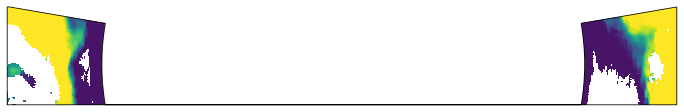

In [36]:
fig,ax = plt.subplots(figsize=(12,12),subplot_kw={'projection':ccrs.AlbersEqualArea(false_easting=1e9)})
ax.pcolormesh(ds['longitude'],ds['latitude'],ds['sst']-273.15,transform=ccrs.PlateCarree(central_longitude=180),vmin=-2,vmax=4)
ax.set_extent([-180,-150,60,90])

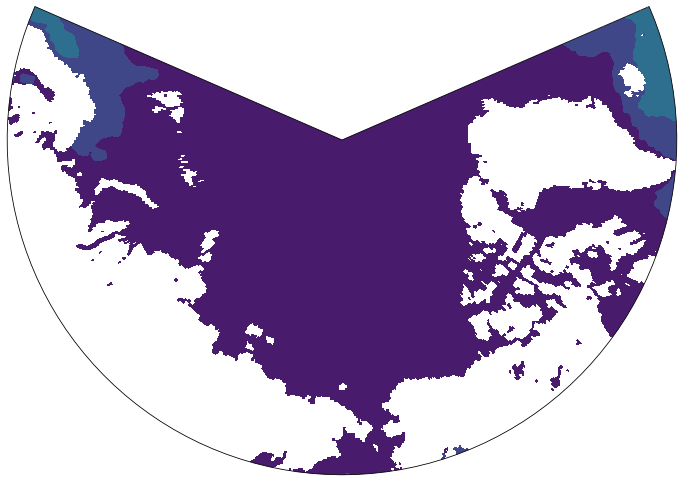

In [37]:
fig,ax = plt.subplots(figsize=(12,12),subplot_kw={'projection':ccrs.LambertConformal(central_longitude=-180,
                                                                                central_latitude=60, 
                                                                                false_easting=0.0, 
                                                                                false_northing=0.0, 
                                                                                secant_latitudes=None, 
                                                                                standard_parallels=None, 
                                                                                globe=None, 
                                                                                cutoff=60)})
ax.pcolormesh(ds['longitude'],ds['latitude'],ds['sst'],transform=ccrs.PlateCarree(),vmin=-2,vmax=4)
ax.set_boundary(

In [7]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 1959-01-01
Data variables:
    sst        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-16 22:06:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...